<a href="https://colab.research.google.com/github/74527mohammad/Python/blob/main/SLR_delivery_assngmnt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [59]:
data = pd.read_csv("/content/delivery_time.csv")

In [16]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

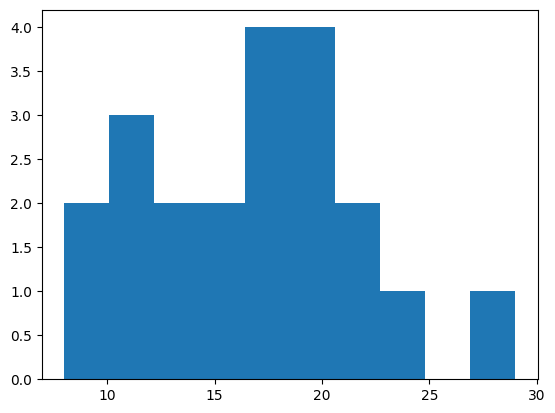

In [17]:
plt.hist(data["Delivery Time"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e4733db02b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e4733db06d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e4733f83fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e4733db0c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e4733db0eb0>],
 'means': []}

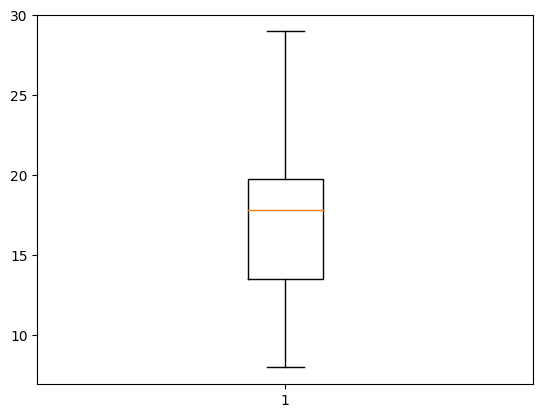

In [18]:
plt.boxplot(data["Delivery Time"])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

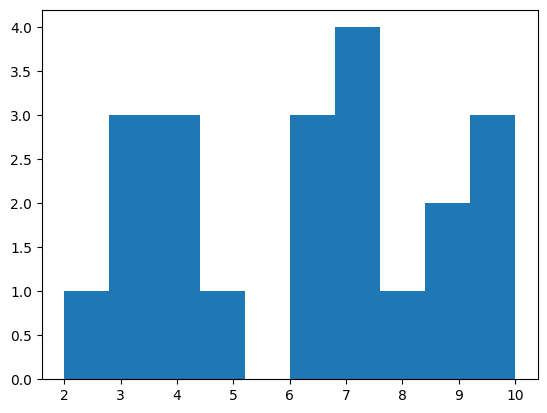

In [19]:
plt.hist(data["Sorting Time"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e4733e93e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7e4733cc83a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e4733e93b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7e4733cc8880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e4733cc8b20>],
 'means': []}

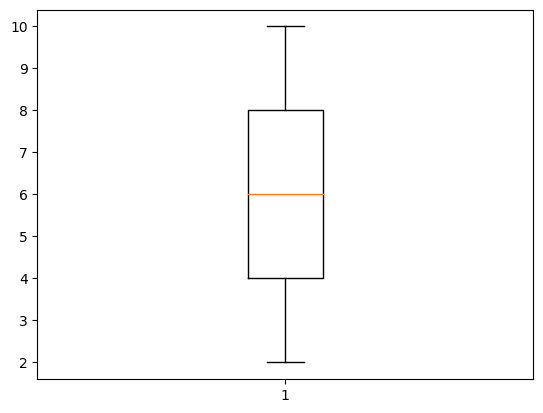

In [20]:
plt.boxplot(data["Sorting Time"])

Text(0.5, 1.0, 'Delivery X Sorting time')

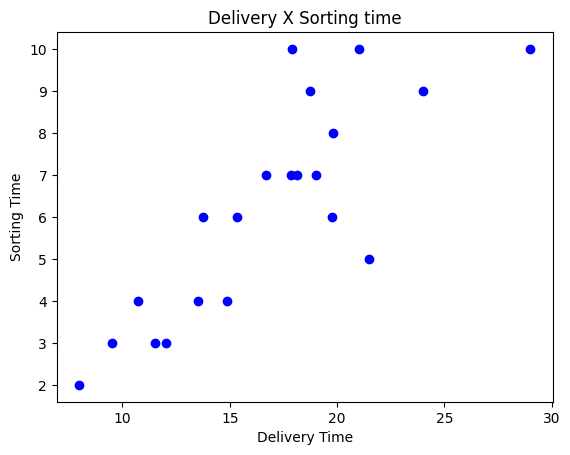

In [21]:
plt.plot(data["Delivery Time"],data["Sorting Time"],"bo")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("Delivery X Sorting time")

In [60]:
data["Sorting Time"].corr(data["Delivery Time"])

0.8259972607955325

In [61]:
np.corrcoef(data["Sorting Time"],data["Delivery Time"])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [62]:
data.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},inplace=True)
data.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

In [63]:
#preparing model
model = smf.ols("sorting_time~delivery_time",data = data).fit()

In [64]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        18:33:47   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
delivery_time,0.278169,0.549318


In [67]:
pred = model.predict(data.iloc[:,0])

Text(0, 0.5, 'sorting time')

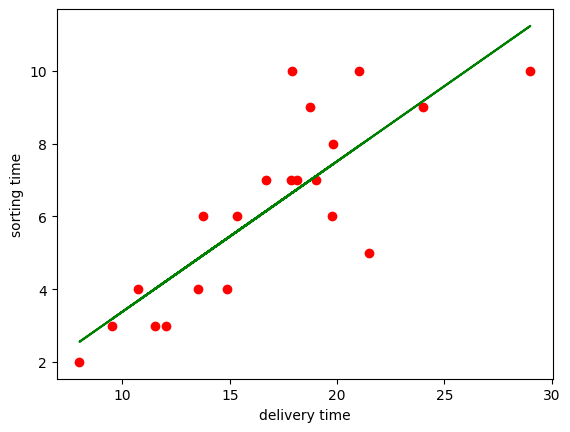

In [72]:
plt.scatter(x=data["delivery_time"],y=data["sorting_time"],color="red")
plt.plot(data["delivery_time"],pred,color="green")
plt.xlabel("delivery time")
plt.ylabel("sorting time")

In [73]:
pred.corr(data.sorting_time)

0.8259972607955326

In [74]:
#Transforming variables for accuracy
model2 = smf.ols("sorting_time~np.log(delivery_time)",data=data).fit()

In [75]:
model2.params

Intercept               -12.499233
np.log(delivery_time)     6.735548
dtype: float64

In [76]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.59e-06
Time:                        18:37:49   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
print(model2.conf_int(0.01)) #99% condifence

                               0         1
Intercept             -20.369797 -4.628668
np.log(delivery_time)   3.916690  9.554407


In [78]:
pred2 = model2.predict(pd.DataFrame(data["delivery_time"]))
pred2.corr(data.sorting_time)

0.8431772637224149

In [79]:
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

Text(0, 0.5, 'Sorting Time')

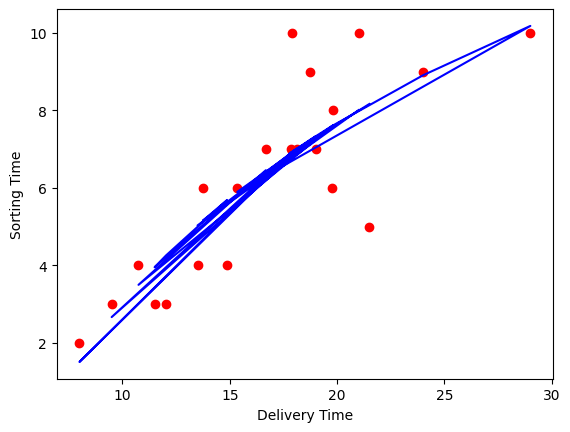

In [80]:
plt.scatter(x=data["delivery_time"],y=data["sorting_time"],color="red")
plt.plot(data["delivery_time"],pred2,color="blue")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

In [81]:
#exponential transformation
model3 = smf.ols("np.log(sorting_time)~delivery_time",data=data).fit()

In [82]:
model3.params

Intercept        0.437237
delivery_time    0.076901
dtype: float64

In [83]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                          18:39:44   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
print(model3.conf_int(0.01))

                      0         1
Intercept     -0.147491  1.021964
delivery_time  0.043499  0.110302


In [85]:
pred_log = model3.predict(pd.DataFrame(data["delivery_time"]))
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [86]:
pred3 = np.exp(pred_log)

Text(0, 0.5, 'Sorrting time')

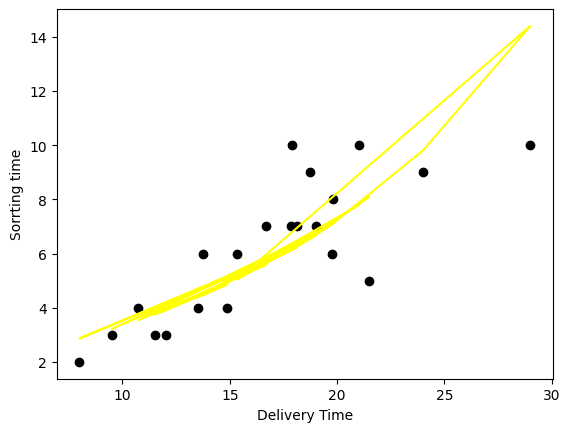

In [87]:
plt.scatter(x=data["delivery_time"],y=data["sorting_time"],color="black")
plt.plot(data.delivery_time,pred3,color="yellow")
plt.xlabel("Delivery Time")
plt.ylabel("Sorrting time")

In [88]:
resid3 = pred3-data.sorting_time

In [90]:
time_resid = model3.resid_pearson
time_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Time residual')

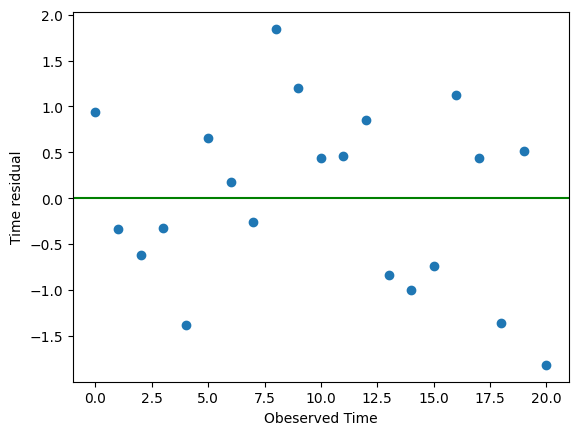

In [92]:
plt.plot(time_resid,"o")
plt.axhline(y=0,color="green")
plt.xlabel("Obeserved Time")
plt.ylabel("Time residual")

Text(0, 0.5, 'actual')

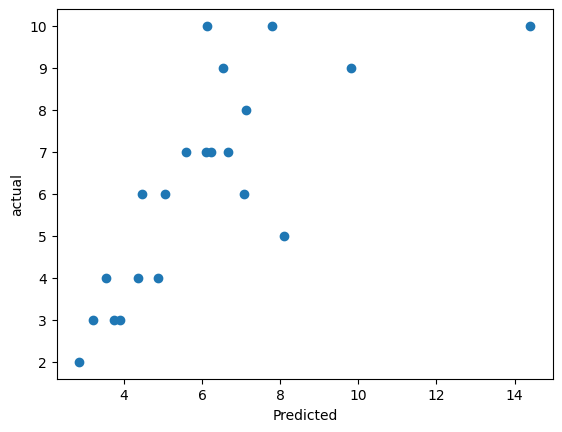

In [93]:
#visualization of predicted vs acutal values
plt.scatter(x=pred3,y=data.sorting_time)
plt.xlabel("Predicted")
plt.ylabel("actual")

In [99]:
#quadratic value
data["delivery_time_sq"] = data.delivery_time*data.delivery_time
model_quad = smf.ols("sorting_time~delivery_time+delivery_time_sq",data=data).fit()

In [100]:
data

,delivery_time,sorting_time,delivery_time_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [101]:
model_quad.params

Intercept          -4.640096
delivery_time       0.894094
delivery_time_sq   -0.013646
dtype: float64

In [102]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.19e-05
Time:                        18:54:14   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.6401      2.864     -1.620      0.123     -10.657       1.377
delivery_time        0.8941      0.333      2.685      0.015       0.194       1.594
delivery_time_sq    -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
pred_quad = model_quad.predict(model_quad.params)

In [115]:
model_quad.conf_int(0.05)

,0,1
Intercept,-10.657470,1.377279
delivery_time,0.194383,1.593804
delivery_time_sq,-0.033167,0.005874


In [119]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression


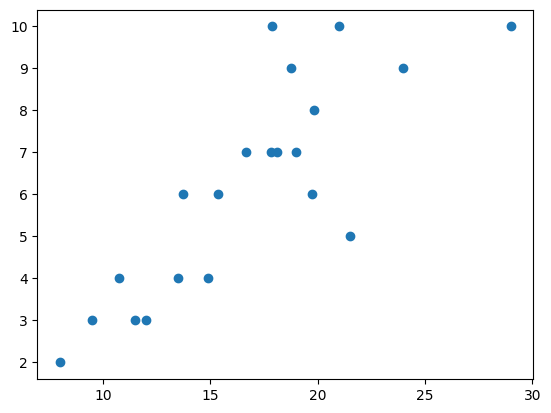

In [120]:
plt.scatter(data.delivery_time,data.sorting_time)

In [121]:
model1 = LinearRegression()

In [122]:
model1.fit(data.delivery_time.values.reshape(-1,1),data.sorting_time)

LinearRegression()

In [123]:
pred1 = model1.predict(data.delivery_time.values.reshape(-1,1))

In [124]:
#rmse
model1.score(data.delivery_time.values.reshape(-1,1),data.sorting_time)# 0.6700
rmse1 = np.sqrt(np.mean((pred1-data.sorting_time)**2)) # 32.760
model1.coef_
model1.intercept_

-0.7566733660351268

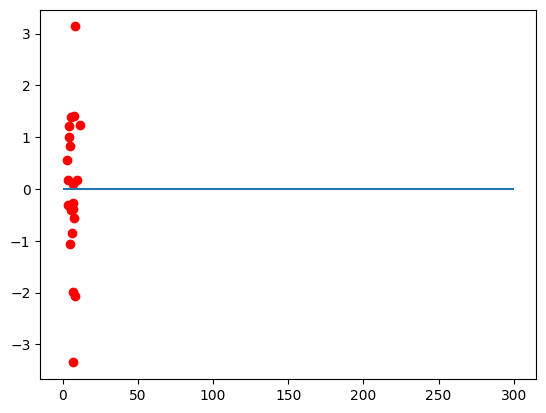

In [125]:
plt.scatter(pred1,(pred1-data.sorting_time),c="r")
plt.hlines(y=0,xmin=0,xmax=300)


(array([1., 1., 1., 2., 5., 3., 3., 4., 0., 1.]),
 array([-3.35066242, -2.70171472, -2.05276701, -1.40381931, -0.7548716 ,
        -0.10592389,  0.54302381,  1.19197152,  1.84091922,  2.48986693,
         3.13881464]),
 <BarContainer object of 10 artists>)

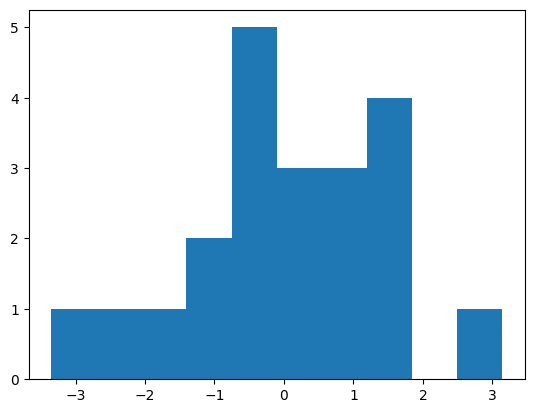

In [127]:
plt.hist(pred1-data.sorting_time)

In [128]:
#fitting quadratic regression
data["delivery_time_sqrd"] = data.delivery_time*data.delivery_time

In [130]:
model2 = LinearRegression()
model2.fit(X = data.iloc[:,[0,2]],y=data.sorting_time)

LinearRegression()

In [131]:
pred2 = model2.predict(data.iloc[:,[0,2]])

In [132]:
model2.score(data.iloc[:,[0,2]],data.sorting_time)


0.7162727530109554

In [133]:
rmse2 = np.sqrt(np.mean((pred2-data.sorting_time)**2))

In [135]:
model2.coef_
model2.intercept_

-4.640095582578902

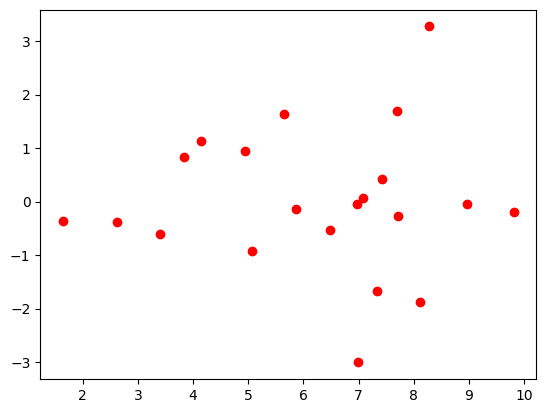

In [136]:
#visualization of residuals vs fitted values
plt.scatter(pred2,(pred2-data.sorting_time),c="r")

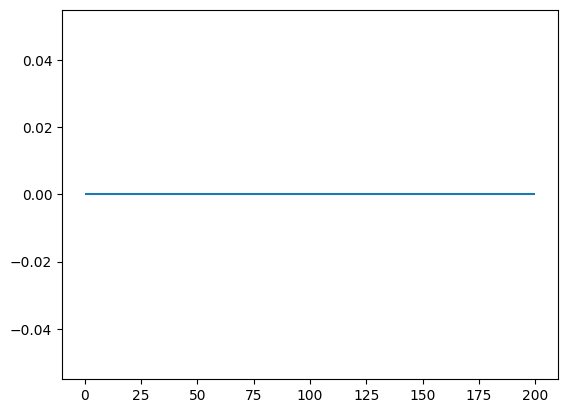

In [137]:
plt.hlines(y=0,xmin=0,xmax=200)

(array([1., 1., 1., 3., 8., 1., 3., 2., 0., 1.]),
 array([-3.00823901, -2.37992491, -1.75161081, -1.12329672, -0.49498262,
         0.13333148,  0.76164558,  1.38995968,  2.01827378,  2.64658788,
         3.27490198]),
 <BarContainer object of 10 artists>)

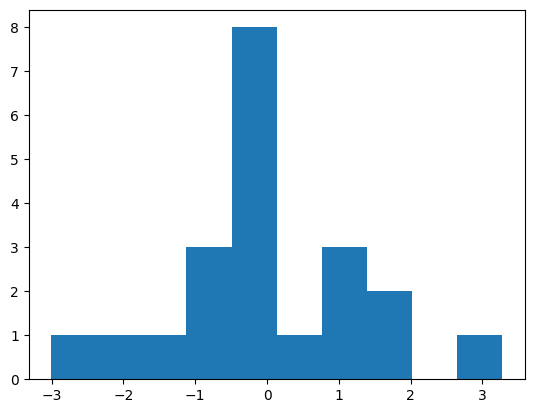

In [138]:
plt.hist(pred2-data.sorting_time)

In [139]:
import pylab
import scipy.stats as st

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.00823901, -1.88216022, -1.67337684, -0.92631588, -0.60559149,
         -0.52332718, -0.37778585, -0.36071024, -0.27634935, -0.18794554,
         -0.13113929, -0.0421346 , -0.03669472,  0.07632571,  0.42135928,
          0.83725561,  0.94312634,  1.14094322,  1.64252516,  1.69533292,
          3.27490198])),
 (1.3869056956098547, -1.5812496580097318e-15, 0.9740418427229266))

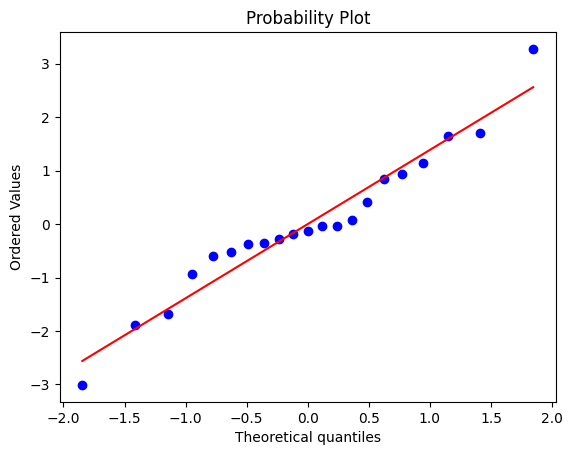

In [140]:
st.probplot(pred2-data.sorting_time,dist="norm",plot=pylab)


In [141]:
#preparing a model
data["sorting_time_sqrt"] = np.sqrt(data.sorting_time)

In [143]:
model3 = LinearRegression()
model3.fit(X=data.iloc[:,[0,2]],y=data.sorting_time_sqrt)
pred3 = model3.predict(data.iloc[:,[0,2]])

In [144]:
model3.score(data.iloc[:,[0,2]],data.sorting_time_sqrt)

0.7577881489466626

In [145]:
rmse3 = np.sqrt(np.mean(((pred3)**2-data.sorting_time)**2))

In [146]:
model3.coef_
model3.intercept_

-0.1392288379030604

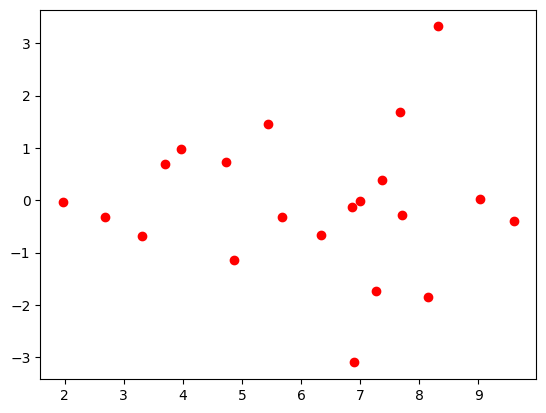

In [147]:
plt.scatter((pred3)**2,((pred3)**2-data.sorting_time),c="r")

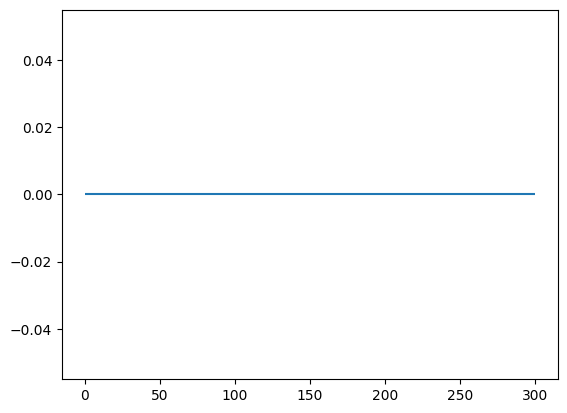

In [148]:
plt.hlines(y=0,xmin=0,xmax=300)

(array([1., 1., 1., 3., 8., 3., 1., 2., 0., 1.]),
 array([-3.09757539, -2.45583774, -1.81410008, -1.17236242, -0.53062477,
         0.11111289,  0.75285054,  1.3945882 ,  2.03632586,  2.67806351,
         3.31980117]),
 <BarContainer object of 10 artists>)

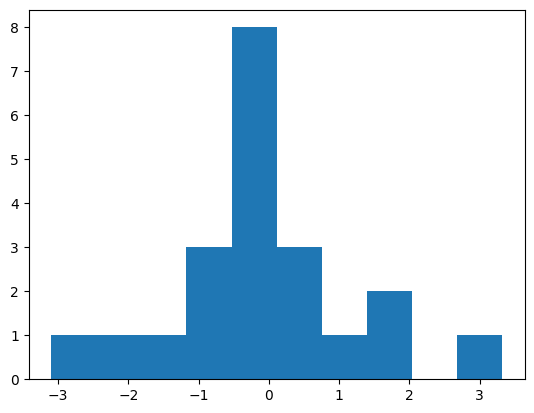

In [149]:
plt.hist((pred3)**2-data.sorting_time)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.09757539, -1.85078985, -1.72618228, -1.13153871, -0.68996514,
         -0.66287612, -0.40044779, -0.31853878, -0.31433374, -0.2850865 ,
         -0.12903228, -0.03055362, -0.00397624,  0.02421913,  0.37912592,
          0.6965875 ,  0.73870978,  0.97216019,  1.44861991,  1.68350897,
          3.31980117])),
 (1.38422662352949, -0.065626849846889, 0.9725481989461069))

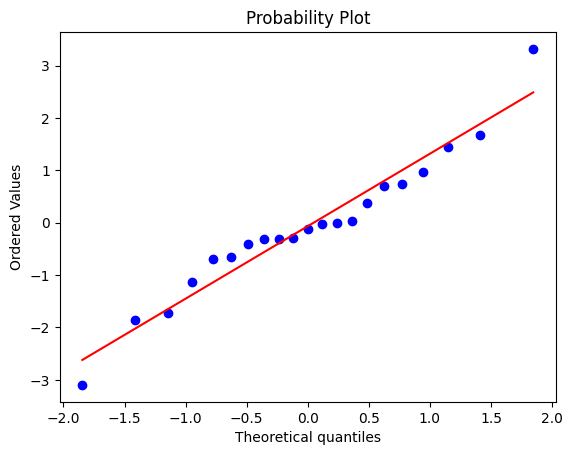

In [150]:
st.probplot((pred3)**2-data.sorting_time,dist="norm",plot=pylab)

In [152]:
model4 = LinearRegression()
model4.fit(X = data.delivery_time.values.reshape(-1,1),y=data.sorting_time_sqrt)
pred4 = model4.predict(data.delivery_time.values.reshape(-1,1))

In [153]:
#adjusting r squared values
model4.score(data.delivery_time.values.reshape(-1,1),data.sorting_time_sqrt)
rmse4 = np.sqrt(np.mean(((pred4)**2-data.sorting_time)**2))

In [154]:
model4.coef_
model4.intercept_

0.9609339829284427

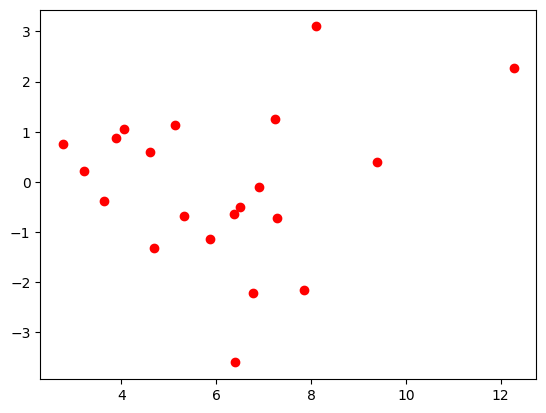

In [155]:
plt.scatter((pred4)**2,((pred4)**2-data.sorting_time),c="r")

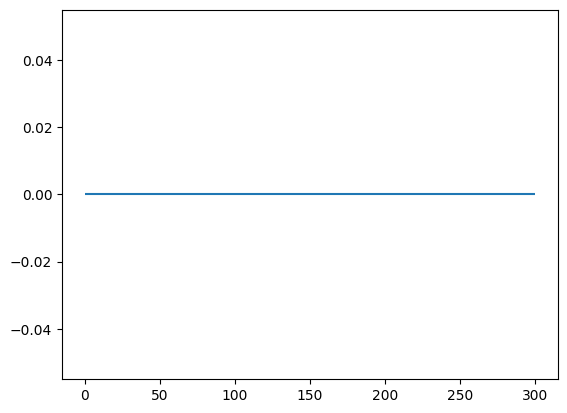

In [156]:
plt.hlines(y=0,xmin=0,xmax=300)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.59789074, -2.21523033, -2.14869485, -1.30668637, -1.12771038,
         -0.71300551, -0.67923307, -0.62890896, -0.50438413, -0.37709248,
         -0.10056946,  0.21773762,  0.39440927,  0.59882889,  0.7632391 ,
          0.87753867,  1.0626923 ,  1.13237041,  1.24917776,  2.27369531,
          3.09888149])),
 (1.6050450963452163, -0.0824207359665142, 0.98795907048498))

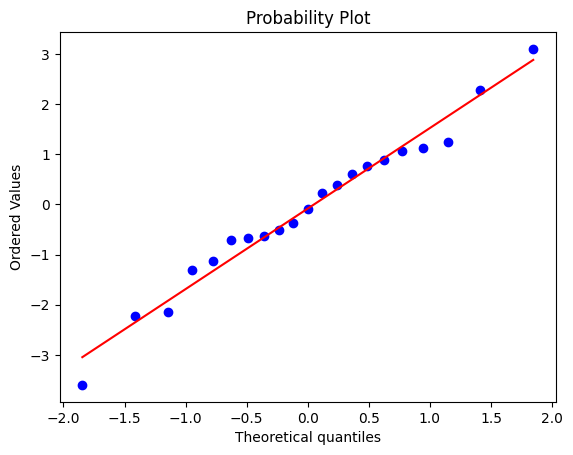

In [162]:
st.probplot((pred4)**2-data.sorting_time,dist="norm",plot=pylab)

(array([1., 0., 2., 2., 5., 3., 4., 2., 1., 1.]),
 array([-3.59789074, -2.92821351, -2.25853629, -1.58885907, -0.91918185,
        -0.24950462,  0.4201726 ,  1.08984982,  1.75952704,  2.42920427,
         3.09888149]),
 <BarContainer object of 10 artists>)

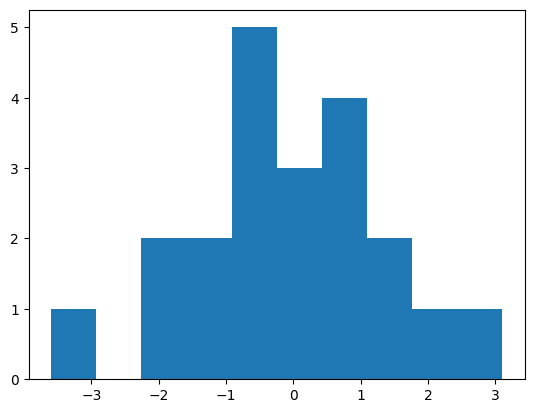

In [163]:
plt.hist((pred4)**2-data.sorting_time)

In [164]:
data

,delivery_time,sorting_time,delivery_time_sq,delivery_time_sqrd,sorting_time_sqrt
0,21.00,10,441.0000,441.0000,3.162278
1,13.50,4,182.2500,182.2500,2.000000
2,19.75,6,390.0625,390.0625,2.449490
3,24.00,9,576.0000,576.0000,3.000000
4,29.00,10,841.0000,841.0000,3.162278
5,15.35,6,235.6225,235.6225,2.449490
6,19.00,7,361.0000,361.0000,2.645751
7,9.50,3,90.2500,90.2500,1.732051
8,17.90,10,320.4100,320.4100,3.162278
9,18.75,9,351.5625,351.5625,3.000000
